<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Procesos-Estocasticos/blob/main/Movimiento_Aleatorio_de_una_Part%C3%ADcula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movimiento Aleatorio de una Partícula

Una caminata aleatoria unidimensional se define como:

$$
X_{n+1} =
\begin{cases}
X_n + 1 & \text{con probabilidad } p \\
X_n - 1 & \text{con probabilidad } 1-p
\end{cases}
$$

con condición inicial:

$$
X_0 = 0
$$

La posición después de $n$ pasos es:

$$
X_n = \sum_{i=1}^{n} Y_i
$$

donde:

$$
Y_i =
\begin{cases}
+1 & \text{con probabilidad } p \\
-1 & \text{con probabilidad } 1-p
\end{cases}
$$

El valor esperado es:

$$
\mathbb{E}[X_n] = n(2p - 1)
$$

Imaginemos una partícula situada inicialmente en el origen ($X_0=0$) de una recta numérica. En cada instante discreto de tiempo, la partícula debe tomar una decisión: moverse un paso a la derecha con una probabilida $p$ o un paso a la izquierda con una probabilida $q$, de tal mandera que se cumpla la siguiente expresion.

$$p+q=1$$

 Este proceso define como una caminata aleatoria unidimensional.

Cada nuevo paso depende únicamente de una decisión aleatoria independiente del pasado. Así, después de $n$ movimientos, la posición de la partícula es el resultado acumulado de todos los desplazamientos previos:

$$X_n = \sum_{i=1}^{n} Y_i$$

donde cada $Y_i$ puede valer $1$ o $-1$ según las probabilidades establecidas.

Este modelo permite estudiar cómo un comportamiento simple y aleatorio puede generar patrones globales cuando se repite muchas veces, mostrando cómo pequeñas diferencias en probabilidad pueden producir tendencias observables en el largo plazo.

In [41]:
import random  # Importa la librería random para generar números aleatorios
import matplotlib.pyplot as plt  # Importa matplotlib para graficar

In [42]:
def caminata_aleatoria(n_pasos=100, p=0.5):
    # Define la función de la caminata aleatoria
    # n_pasos es el número de movimientos
    # p es la probabilidad de moverse a la derecha

    if p < 0 or p > 1:
        # Verifica que la probabilidad esté en el rango válido
        raise ValueError("p debe estar entre 0 y 1")
        # Lanza un error si p no es válida

    posiciones = [0]
    # Crea una lista llamada posiciones
    # Inicia en 0 (posición inicial de la partícula)

    for i in range(n_pasos):
        # Repite el proceso n_pasos veces

        r = random.random()
        # Genera un número aleatorio uniforme entre 0 y 1

        if r < p:
            # Si el número aleatorio es menor que p
            nuevo = posiciones[-1] + 1
            # Se mueve una unidad a la derecha
        else:
            nuevo = posiciones[-1] - 1
            # En caso contrario se mueve una unidad a la izquierda

        posiciones.append(nuevo)
        # Agrega la nueva posición a la lista

    return posiciones
    # Devuelve la lista completa de posiciones


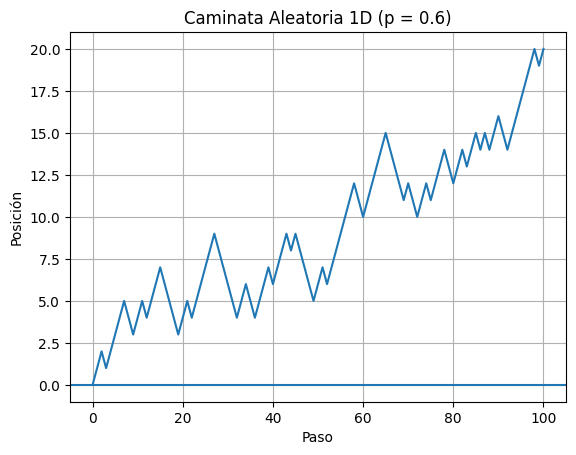

In [43]:
# Parámetros
n = 100
# Número total de pasos que dará la partícula

p = 0.6
# Probabilidad de moverse a la derecha (60%)

trayectoria = caminata_aleatoria(n, p)
# Ejecuta la función y guarda la trayectoria generada

plt.figure()
# Crea una nueva figura para la gráfica

plt.plot(trayectoria)
# Dibuja la trayectoria como una sola línea

plt.title(f"Caminata Aleatoria 1D (p = {p})")
# Coloca el título de la gráfica

plt.xlabel("Paso")
# Etiqueta del eje horizontal (número de paso)

plt.ylabel("Posición")
# Etiqueta del eje vertical (posición en la recta)

plt.axhline(0)
# Dibuja una línea horizontal en y=0 para marcar el origen
plt.grid(True)
# Activa la cuadrícula
plt.show()
# Muestra la gráfica en pantalla

# Análisis y Conclusiones

Cuando p = 0.5, la caminata no presenta dirección preferente.
Sin embargo, la trayectoria individual puede alejarse considerablemente del origen debido a la variabilidad inherente al proceso.

Cuando p > 0.5, se observa una tendencia creciente en la trayectoria,
coherente con el valor esperado:

$$
\mathbb{E}[X_n] = n(2p - 1)
$$

Cuando p < 0.5, la probabilidad de q es complementaria a p el comportamiento es igual al caso anterior pero con el desplazamiento anterior

La caminata aleatoria modela fenómenos como movimiento browniano discreto,
mercados financieros simplificados y procesos físicos microscópicos.

Este simulacion muestra cómo pequeñas diferencias en probabilidad generan
comportamientos macroscópicos distintos al acumularse en el tiempo.

##Preguntas que surgieron y su solucion

##¿Cuál fue el máximo alejamiento?

In [44]:
# Máximo alejamiento respecto al origen
max_alejamiento = max(abs(x) for x in trayectoria)

print("Máximo alejamiento:", max_alejamiento)

Máximo alejamiento: 20


##¿Cuánto tiempo tarda en regresar al origen?

In [45]:
# Tiempo del primer regreso al origen
tiempo_regreso = None

for i in range(1, len(trayectoria)):
    if trayectoria[i] == 0:
        tiempo_regreso = i
        break

if tiempo_regreso is not None:
    print("Primer regreso al origen en el paso:", tiempo_regreso)
else:
    print("No regresó al origen")

No regresó al origen


##¿Cuánto se aleja en promedio?

In [46]:
# Distancia promedio respecto al origen
distancia_promedio = sum(abs(x) for x in trayectoria) / len(trayectoria)

print("Alejamiento promedio:", distancia_promedio)

Alejamiento promedio: 9.128712871287128


##¿Cuál es la posición promedio?

In [47]:
# Posición promedio
posicion_promedio = sum(trayectoria) / len(trayectoria)

print("Posición promedio:", posicion_promedio)

Posición promedio: 9.128712871287128


##¿Regresa y cuántas veces regresa al origen?

In [48]:
# Número de veces que regresa al origen (sin contar el inicio)
regresos = sum(1 for x in trayectoria[1:] if x == 0)

if regresos > 0:
    print("Sí regresó al origen.")
    print("Número de regresos:", regresos)
else:
    print("No regresó al origen.")

No regresó al origen.
